# Historical Housing Metrics

### 1. Imports

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

### 2. Data processing

#### 2.1. Reading data from CSV

In [67]:
SHILLER_DATA_PATH = "../../data/raw/economy/shiller.csv"
REAL_ESTATE_DATA_PATH = "../../data/raw/housing/real_estate.csv"

INFLATION_COLS = [ "date", "cpi" ]
INDICES_COLS = [ "date", "home_price_index", "building_cost_index", "population_millions" ]

HOUSING_COLS_MAP = {
  "date": "date",
  "cpi": "cpi",
  "home_price_index": "hpi",
  "building_cost_index": "bci",
  "population_millions": "population",
}
HOUSING_COLS = list(HOUSING_COLS_MAP.keys())

In [68]:
shiller_df = pd.read_csv(SHILLER_DATA_PATH)
real_estate_df = pd.read_csv(REAL_ESTATE_DATA_PATH)

#### 2.2. Keeping only the relevant information

In [69]:
inflation_df = shiller_df[INFLATION_COLS]
indices_df = real_estate_df[INDICES_COLS]

In [70]:
housing_df = pd.merge(inflation_df, indices_df, on="date", how="inner")
housing_df = housing_df.rename(columns=HOUSING_COLS_MAP)
housing_df

,date,cpi,hpi,bci,population
0,1890-01,7.612,3.557296,104.120373,63.0560
1,1890-02,7.612,3.528281,103.628018,63.1648
2,1890-03,7.612,3.499266,103.135663,63.2735
3,1890-04,7.612,3.470250,102.643308,63.3823
4,1890-05,7.707,3.441235,102.150953,63.4910
...,...,...,...,...,...
1615,2024-08,314.796,325.020000,8380.833300,341.1295
1616,2024-09,315.301,324.800000,8404.666700,341.2750
1617,2024-10,315.664,324.220000,8428.500000,341.4205
1618,2024-11,315.493,323.910000,8452.333300,341.5660


#### 2.3. Appending additional columns

##### 2.3.1. Real HPI and real BCI

In [71]:
curr_cpi = housing_df.iloc[-1]["cpi"]

housing_df["real_hpi"] = housing_df["hpi"] * (curr_cpi / housing_df["cpi"])
housing_df["real_hpi"] = housing_df["real_hpi"] / housing_df.iloc[0]["real_hpi"]

housing_df["real_bci"] = housing_df["bci"] * (curr_cpi / housing_df["cpi"])
housing_df["real_bci"] = housing_df["real_bci"] / housing_df.iloc[0]["real_bci"]

housing_df = housing_df.drop(columns=["cpi", "hpi", "bci"])
housing_df

,date,population,real_hpi,real_bci
0,1890-01,63.0560,1.000000,1.000000
1,1890-02,63.1648,0.991843,0.995271
2,1890-03,63.2735,0.983687,0.990543
3,1890-04,63.3823,0.975530,0.985814
4,1890-05,63.4910,0.955449,0.968992
...,...,...,...,...
1615,2024-08,341.1295,2.209325,1.946351
1616,2024-09,341.2750,2.204293,1.948759
1617,2024-10,341.4205,2.197827,1.952038
1618,2024-11,341.5660,2.196915,1.958619


##### 2.3.2. Basic monthly index inflation measures

In [72]:
housing_df["1_mo_hpi"] = housing_df["real_hpi"].pct_change()
housing_df["1_mo_bci"] = housing_df["real_bci"].pct_change()
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci
0,1890-01,63.0560,1.000000,1.000000,NaN,NaN
1,1890-02,63.1648,0.991843,0.995271,-0.008157,-0.004729
2,1890-03,63.2735,0.983687,0.990543,-0.008224,-0.004751
3,1890-04,63.3823,0.975530,0.985814,-0.008292,-0.004774
4,1890-05,63.4910,0.955449,0.968992,-0.020585,-0.017064
...,...,...,...,...,...,...
1615,2024-08,341.1295,2.209325,1.946351,-0.002164,0.002036
1616,2024-09,341.2750,2.204293,1.948759,-0.002277,0.001238
1617,2024-10,341.4205,2.197827,1.952038,-0.002934,0.001683
1618,2024-11,341.5660,2.196915,1.958619,-0.000415,0.003371


##### 2.3.3. Annualized 1-year index inflation measure

In [73]:
housing_df["1_yr_hpi"] = housing_df["real_hpi"].pct_change(periods=12)
housing_df["1_yr_bci"] = housing_df["real_bci"].pct_change(periods=12)
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci
0,1890-01,63.0560,1.000000,1.000000,NaN,NaN,NaN,NaN
1,1890-02,63.1648,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN
2,1890-03,63.2735,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN
3,1890-04,63.3823,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN
4,1890-05,63.4910,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN
...,...,...,...,...,...,...,...,...
1615,2024-08,341.1295,2.209325,1.946351,-0.002164,0.002036,0.017584,0.005996
1616,2024-09,341.2750,2.204293,1.948759,-0.002277,0.001238,0.014857,0.007544
1617,2024-10,341.4205,2.197827,1.952038,-0.002934,0.001683,0.009779,0.006657
1618,2024-11,341.5660,2.196915,1.958619,-0.000415,0.003371,0.009714,0.005828


##### 2.3.4. Annualized 5-year index inflation measure

In [74]:
housing_df["5_yr_hpi"] = housing_df["real_hpi"].pct_change(periods=60)
housing_df["5_yr_bci"] = housing_df["real_bci"].pct_change(periods=60)
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci,5_yr_hpi,5_yr_bci
0,1890-01,63.0560,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1890-02,63.1648,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN,NaN,NaN
2,1890-03,63.2735,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN,NaN,NaN
3,1890-04,63.3823,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN,NaN,NaN
4,1890-05,63.4910,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1615,2024-08,341.1295,2.209325,1.946351,-0.002164,0.002036,0.017584,0.005996,0.251136,0.100768
1616,2024-09,341.2750,2.204293,1.948759,-0.002277,0.001238,0.014857,0.007544,0.248262,0.101116
1617,2024-10,341.4205,2.197827,1.952038,-0.002934,0.001683,0.009779,0.006657,0.246916,0.103611
1618,2024-11,341.5660,2.196915,1.958619,-0.000415,0.003371,0.009714,0.005828,0.244909,0.104860


##### 2.3.5. Annualized 10-year index inflation measure

In [75]:
housing_df["10_yr_hpi"] = housing_df["real_hpi"].pct_change(periods=120)
housing_df["10_yr_bci"] = housing_df["real_bci"].pct_change(periods=120)
housing_df

,date,population,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci,5_yr_hpi,5_yr_bci,10_yr_hpi,10_yr_bci
0,1890-01,63.0560,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1890-02,63.1648,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN,NaN,NaN,NaN,NaN
2,1890-03,63.2735,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN,NaN,NaN,NaN,NaN
3,1890-04,63.3823,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN
4,1890-05,63.4910,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2024-08,341.1295,2.209325,1.946351,-0.002164,0.002036,0.017584,0.005996,0.251136,0.100768,0.466569,0.160036
1616,2024-09,341.2750,2.204293,1.948759,-0.002277,0.001238,0.014857,0.007544,0.248262,0.101116,0.466169,0.160168
1617,2024-10,341.4205,2.197827,1.952038,-0.002934,0.001683,0.009779,0.006657,0.246916,0.103611,0.461078,0.157032
1618,2024-11,341.5660,2.196915,1.958619,-0.000415,0.003371,0.009714,0.005828,0.244909,0.104860,0.454766,0.152508


#### 2.4. Save results as derived dataset 

##### 2.4.1. Keeping only the relevant columns, again

In [76]:
results_df = housing_df.drop(columns=["population"])
results_df

,date,real_hpi,real_bci,1_mo_hpi,1_mo_bci,1_yr_hpi,1_yr_bci,5_yr_hpi,5_yr_bci,10_yr_hpi,10_yr_bci
0,1890-01,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1890-02,0.991843,0.995271,-0.008157,-0.004729,NaN,NaN,NaN,NaN,NaN,NaN
2,1890-03,0.983687,0.990543,-0.008224,-0.004751,NaN,NaN,NaN,NaN,NaN,NaN
3,1890-04,0.975530,0.985814,-0.008292,-0.004774,NaN,NaN,NaN,NaN,NaN,NaN
4,1890-05,0.955449,0.968992,-0.020585,-0.017064,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1615,2024-08,2.209325,1.946351,-0.002164,0.002036,0.017584,0.005996,0.251136,0.100768,0.466569,0.160036
1616,2024-09,2.204293,1.948759,-0.002277,0.001238,0.014857,0.007544,0.248262,0.101116,0.466169,0.160168
1617,2024-10,2.197827,1.952038,-0.002934,0.001683,0.009779,0.006657,0.246916,0.103611,0.461078,0.157032
1618,2024-11,2.196915,1.958619,-0.000415,0.003371,0.009714,0.005828,0.244909,0.104860,0.454766,0.152508


##### 2.4.2. Save simplified results as derived dataset

In [77]:
HOUSING_DATA_PATH = "../../data/derived/housing.csv"

In [78]:
results_df.filter(items=["date", "real_hpi", "real_bci"]).to_csv(HOUSING_DATA_PATH)

### 3. Analysis of results

#### 3.1. U.S. population growth over time

##### 3.1.1. Raw population rate

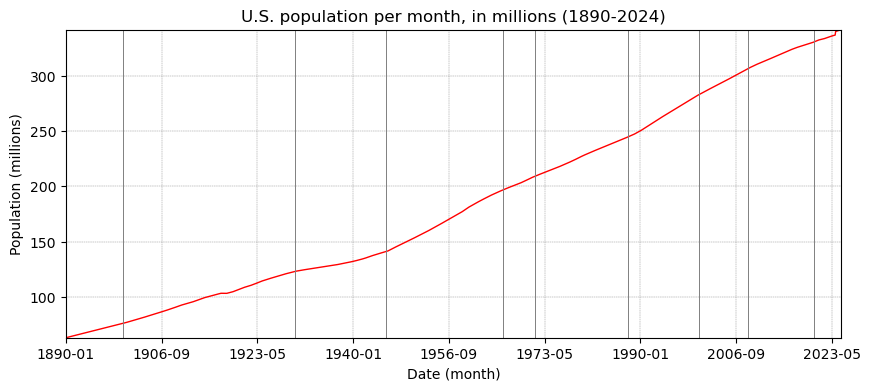

In [79]:
housing_df.plot(x="date", y="population", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("U.S. population per month, in millions (1890-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Population (millions)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.1.2. Differential population rate, month-over-month

In [80]:
pop_stats_df = housing_df.copy()
pop_stats_df["population_diff"] = pop_stats_df["population"].diff()

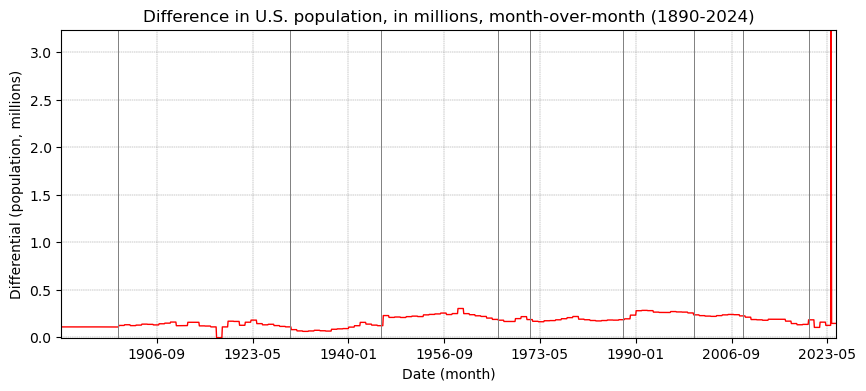

In [81]:
pop_stats_df.plot(x="date", y="population_diff", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Difference in U.S. population, in millions, month-over-month (1890-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Differential (population, millions)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.1.3. Differential population rate, year-over-year

In [82]:
yr_pop_stats_df = housing_df.copy()
yr_pop_stats_df["population_diff"] = yr_pop_stats_df["population"].diff(periods=12)

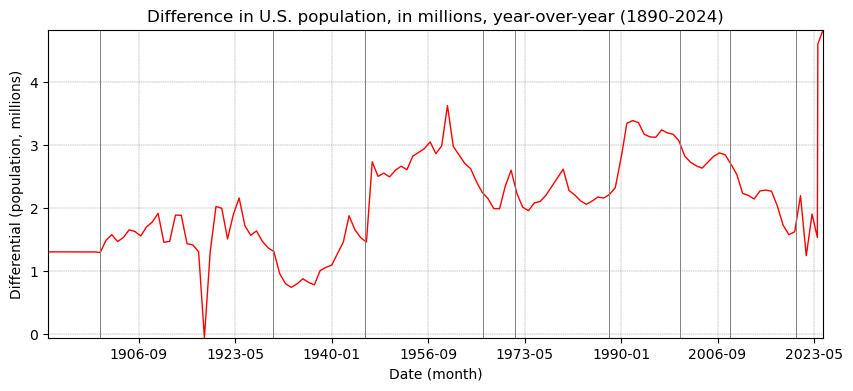

In [83]:
yr_pop_stats_df.plot(x="date", y="population_diff", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Difference in U.S. population, in millions, year-over-year (1890-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Differential (population, millions)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.2. How do housing indices scale as the U.S. population grows?

##### 3.2.1. Real home price index vs U.S. population 

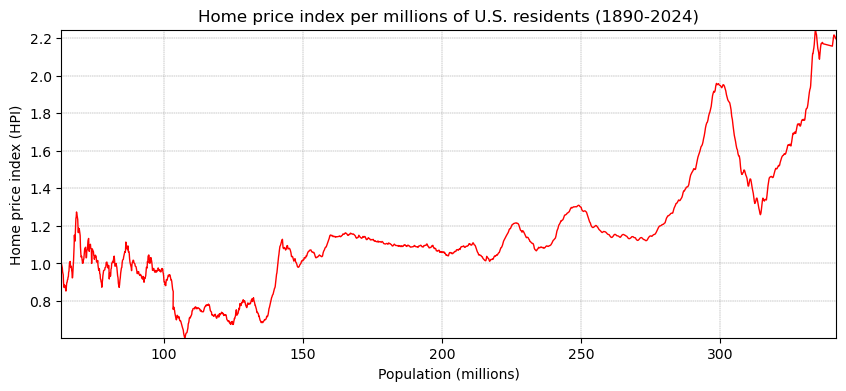

In [84]:
housing_df.plot(x="population", y="real_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.title("Home price index per millions of U.S. residents (1890-2024)")
plt.xlabel("Population (millions)")
plt.ylabel("Home price index (HPI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.2.2. Real building cost index vs U.S. population

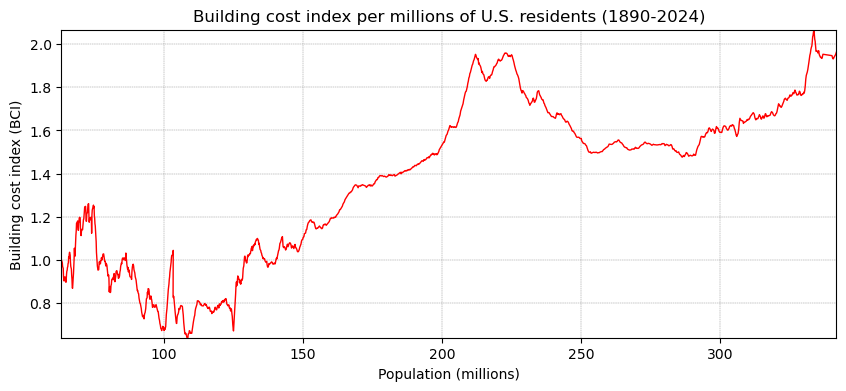

In [85]:
housing_df.plot(x="population", y="real_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.title("Building cost index per millions of U.S. residents (1890-2024)")
plt.xlabel("Population (millions)")
plt.ylabel("Building cost index (BCI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.3. How do the housing indices correlate with each other?

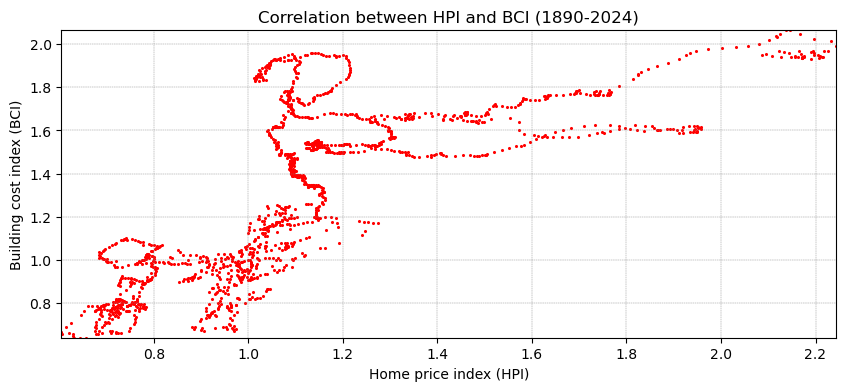

In [86]:
housing_df.plot.scatter(x="real_hpi",y="real_bci",lw=1.0,s=1.5,c='red',legend=False,figsize=(10,4))
plt.title("Correlation between HPI and BCI (1890-2024)")
plt.xlabel("Home price index (HPI)")
plt.ylabel("Building cost index (BCI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.4. Home price index inflation rate analysis

##### 3.4.1. Raw HPI growth rate

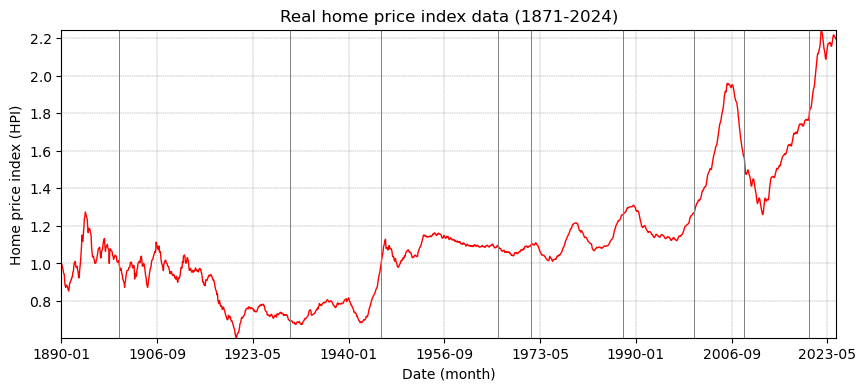

In [87]:
results_df.plot(x="date", y="real_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Real home price index data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Home price index (HPI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.2. Monthly inflation trends (normalized differential rate)

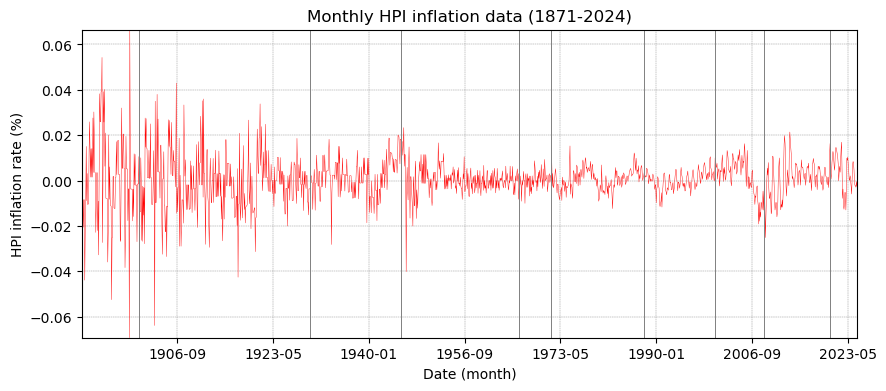

In [88]:
results_df.plot(x="date", y="1_mo_hpi", lw=0.3, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly HPI inflation data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.3. Annual inflation trends

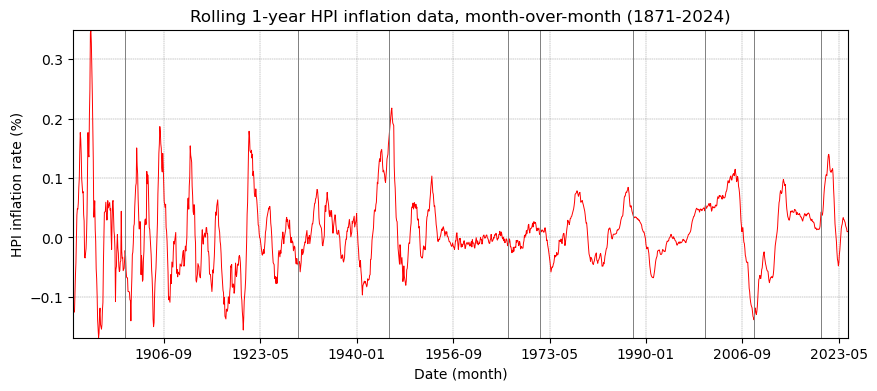

In [89]:
results_df.plot(x="date", y="1_yr_hpi", lw=0.7, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 1-year HPI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.4. 5-year inflation trends

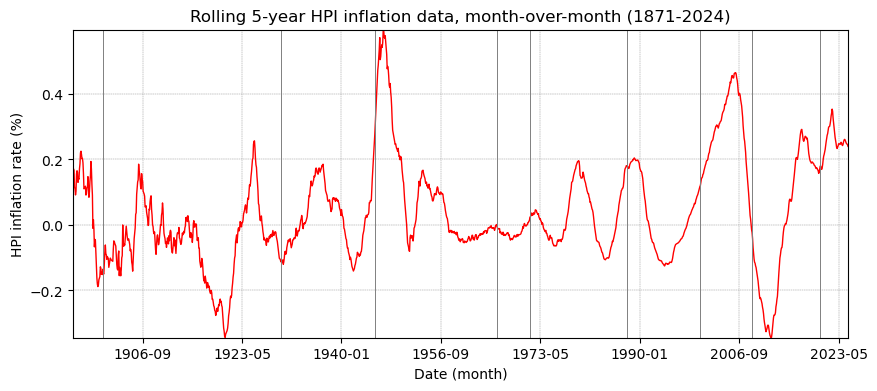

In [90]:
results_df.plot(x="date", y="5_yr_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 5-year HPI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.4.5. 10-year inflation trends

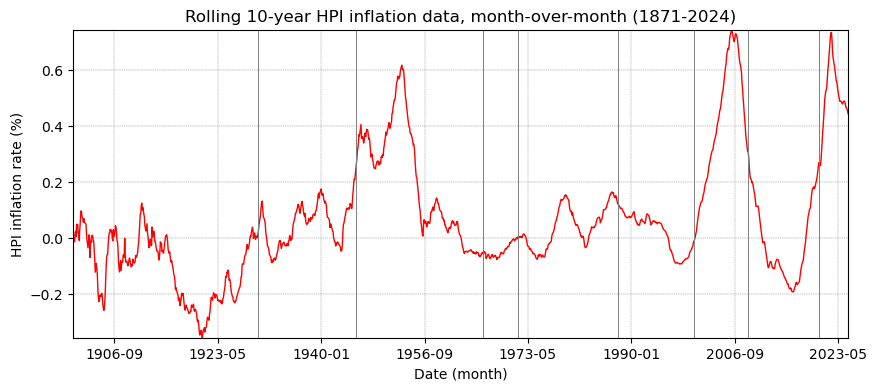

In [91]:
results_df.plot(x="date", y="10_yr_hpi", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 10-year HPI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("HPI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.5. Building cost index inflation rate analysis

##### 3.5.1. Raw BCI growth rate

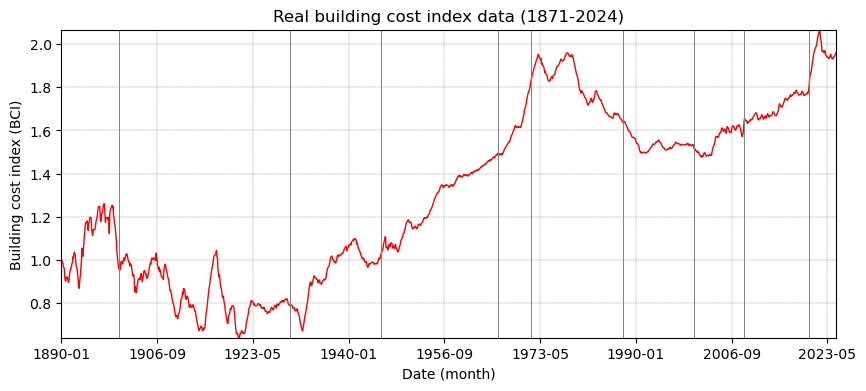

In [92]:
results_df.plot(x="date", y="real_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Real building cost index data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("Building cost index (BCI)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.2. Monthly inflation trends (normalized differential rate)

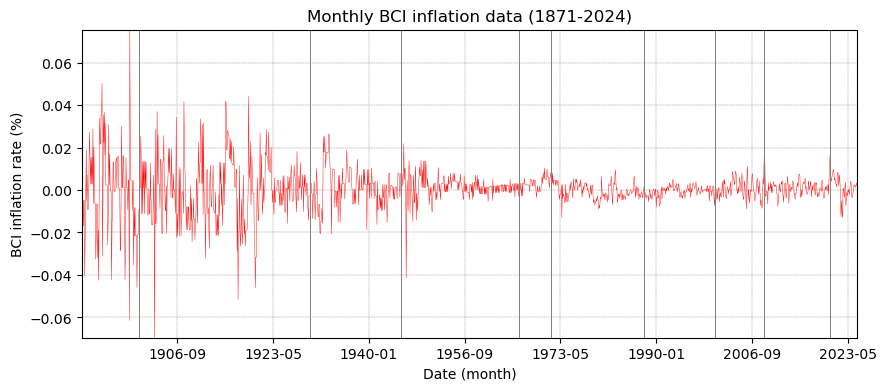

In [93]:
results_df.plot(x="date", y="1_mo_bci", lw=0.3, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Monthly BCI inflation data (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.3. Annual inflation trends

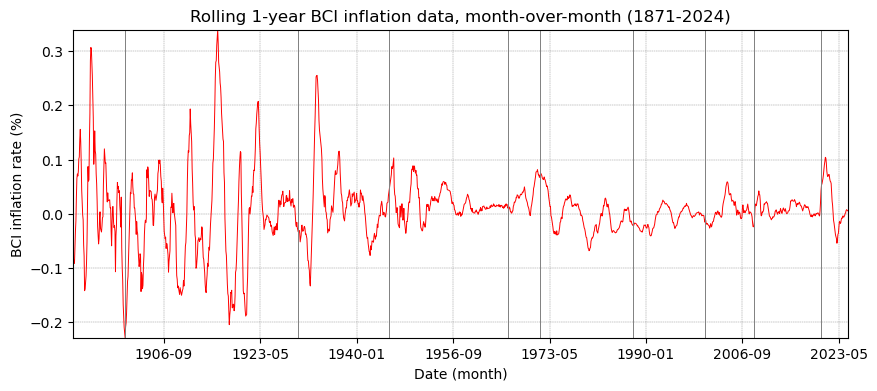

In [94]:
results_df.plot(x="date", y="1_yr_bci", lw=0.7, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 1-year BCI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.4. 5-year inflation trends

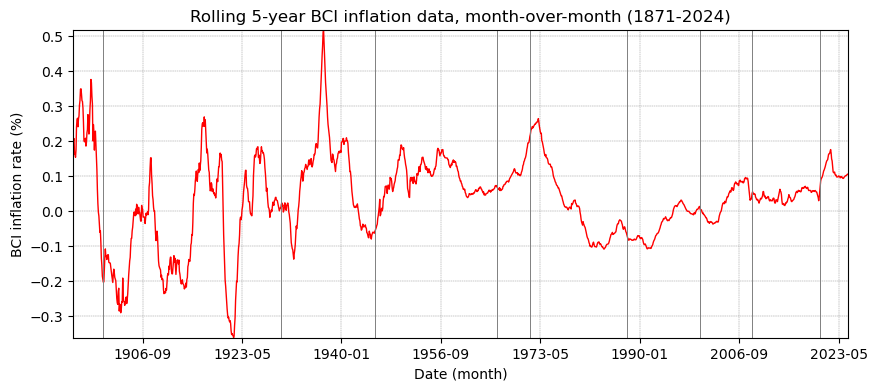

In [95]:
results_df.plot(x="date", y="5_yr_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 5-year BCI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

##### 3.5.5. 10-year inflation trends

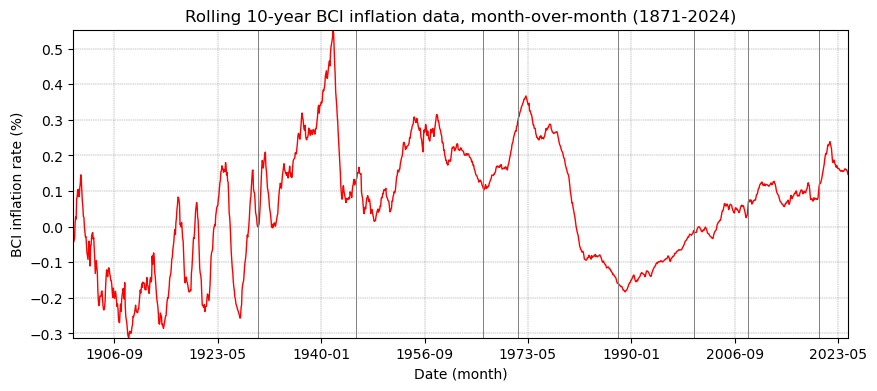

In [96]:
results_df.plot(x="date", y="10_yr_bci", lw=1.0, c='red', legend=False, figsize=(10,4))
plt.axvline(x=120.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=478.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=668.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=913.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=980.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1174.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1322.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1425.0, ls='-', lw=0.7, c='gray')
plt.axvline(x=1562.0, ls='-', lw=0.7, c='gray')
plt.title("Rolling 10-year BCI inflation data, month-over-month (1871-2024)")
plt.xlabel("Date (month)")
plt.ylabel("BCI inflation rate (%)")
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()